In [2]:
import xml.etree.cElementTree as ET
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import re

In [3]:
tree = ET.ElementTree(file='2016/1653457.xml')

In [4]:
root = tree.getroot()

In [5]:
for childOfRoot in root:
    print childOfRoot.tag, childOfRoot.attrib

Award {}


In [6]:
for elem in tree.iter():
    print elem.tag, elem.attrib

rootTag {}
Award {}
AwardTitle {}
AwardEffectiveDate {}
AwardExpirationDate {}
AwardAmount {}
AwardInstrument {}
Value {}
Organization {}
Code {}
Directorate {}
LongName {}
Division {}
LongName {}
ProgramOfficer {}
SignBlockName {}
AbstractNarration {}
MinAmdLetterDate {}
MaxAmdLetterDate {}
ARRAAmount {}
AwardID {}
Investigator {}
FirstName {}
LastName {}
EmailAddress {}
StartDate {}
EndDate {}
RoleCode {}
Institution {}
Name {}
CityName {}
ZipCode {}
PhoneNumber {}
StreetAddress {}
CountryName {}
StateName {}
StateCode {}
ProgramElement {}
Code {}
Text {}
ProgramReference {}
Code {}
Text {}
ProgramReference {}
Code {}
Text {}


In [7]:
for elem in tree.iter(tag='AwardAmount'):
    print elem.tag, elem.text

AwardAmount 436458


In [8]:
for elem in tree.iter('Division'):
    for sub in elem.iter('LongName'):
        print sub.tag, sub.text

LongName Division Of Behavioral and Cognitive Sci


In [9]:
for elem in tree.iter('Investigator'):
    for sub in elem.iter('FirstName'):
        print sub.tag, sub.text
    for sub in elem.iter('LastName'):
        print sub.tag, sub.text

FirstName Timothy
LastName Brady


In [10]:
for elem in tree.iter('Institution'):
    for sub in elem.iter('Name'):
        print sub.tag, sub.text
    for sub in elem.iter('StateName'):
        print sub.tag, sub.text

Name University of California-San Diego
StateName California


In [11]:
!cat 2016/xmlToCSV.py

import xml.etree.cElementTree as ET
import csv
import sys


# open a file for writing

Output = open('Output.csv', 'w')
csvwriter = csv.writer(Output)
header = ['Award', 'Division', 'First Name', 'Last Name', 'Institution', 'State']
csvwriter.writerow(header)
count = 0
for file in sys.argv:
    if(count==0):
        count+=1
        continue
    output_array = []
    tree = ET.ElementTree(file=file)
    for elem in tree.iter('AwardAmount'):
            Award = elem.text
    output_array.append(Award)
    for elem in tree.iter('Division'):
        for sub in elem.iter('LongName'):
            Division = sub.text
    output_array.append(Division)
    for elem in tree.iter('Investigator'):
        for sub in elem.iter('FirstName'):
            FirstName = sub.text
        for sub in elem.iter('LastName'):
            LastName = sub.text
    output_array.append(FirstName)
    output_array.append(LastName)
    for elem in tree.iter('Institution'):
        for sub in elem.iter('Name'):
     

In [12]:
#!python 2016/xmlToCSV.py 2016/*.xml
#creates Output.csv, with all of the pertinant data from the 2016 xml files

In [13]:
data_2016 = pd.read_csv("2016/Output.csv")
data_2016

,Award,Division,First Name,Last Name,Institution,State
0,247911,Division Of Mathematical Sciences,Mattias,Jonsson,University of Michigan Ann Arbor,Michigan
1,1996139,Division Of Ocean Sciences,Daniel,Obenour,University of Michigan Ann Arbor,Michigan
2,10500,Division Of Mathematical Sciences,Jared,Wunsch,Northwestern University,Illinois
3,83117,"Div Of Chem, Bioeng, Env, & Transp Sys",Desiree,Tullos,Oregon State University,Oregon
4,50000,Div Of Industrial Innovation & Partnersh,Bruce,Bunnell,Tulane University,Louisiana
5,468891,Div Atmospheric & Geospace Sciences,Paul,Mayewski,University of Maine,Maine
6,180000,Division Of Mathematical Sciences,Jared,Wunsch,Northwestern University,Illinois
7,130476,Division Of Mathematical Sciences,Shiferaw,Berhanu,Temple University,Pennsylvania
8,146000,Division Of Mathematical Sciences,Alexandru,Ionescu,Princeton University,New Jersey
9,158004,Division Of Mathematical Sciences,Paul,Balmer,University of California-Los Angeles,California


In [14]:
awardsPerState = collections.Counter(list(data_2016.State))
awardsPerState

Counter({nan: 10,
         'Alabama': 122,
         'Alaska': 57,
         'Arizona': 294,
         'Arkansas': 32,
         'California': 1587,
         'Colorado': 371,
         'Connecticut': 164,
         'Delaware': 80,
         'District of Columbia': 236,
         'Florida': 356,
         'Georgia': 337,
         'Guam': 1,
         'Hawaii': 63,
         'Idaho': 46,
         'Illinois': 547,
         'Indiana': 331,
         'Iowa': 127,
         'Kansas': 75,
         'Kentucky': 92,
         'Louisiana': 102,
         'Maine': 48,
         'Maryland': 322,
         'Massachusetts': 824,
         'Michigan': 430,
         'Minnesota': 174,
         'Mississippi': 58,
         'Missouri': 167,
         'Montana': 61,
         'Nebraska': 63,
         'Nevada': 37,
         'New Hampshire': 72,
         'New Jersey': 323,
         'New Mexico': 102,
         'New York': 950,
         'North Carolina': 371,
         'North Dakota': 26,
         'Ohio': 331,
         'Oklahoma': 

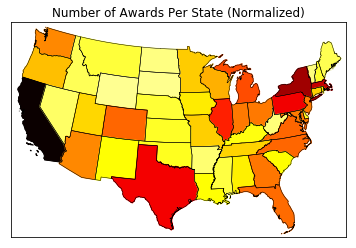

In [16]:

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
for state in awardsPerState:
    awardsPerState[state] = awardsPerState[state] / 1587.0
popdensity = awardsPerState

# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 1 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Number of Awards Per State (Normalized)')
plt.show()

In [17]:
data_2016_sortBy_state = data_2016.sort_values(by=['State'])

In [18]:
for state in awardsPerState:
    awardsPerState[state] = awardsPerState[state] * 1587.0
s=np.zeros(len(awardsPerState)+1)
j=0
for i in awardsPerState:
    s[j] = int(awardsPerState[i])
    j+=1    
print s.shape
print s
x = np.zeros(s.shape[0]-1)
x = s[1:-1]
s = np.copy(x)
print s, s.shape

(56,)
[  1.00000000e+01   5.80000000e+01   7.90000000e+01   1.67000000e+02
   1.74000000e+02   5.47000000e+02   3.20000000e+01   1.02000000e+02
   3.31000000e+02   3.22000000e+02   1.02000000e+02   6.73000000e+02
   2.00000000e+01   1.27000000e+02   2.19000000e+02   4.30000000e+02
   7.50000000e+01   1.56000000e+02   3.69000000e+02   1.94000000e+02
   1.64000000e+02   1.59000000e+02   1.58700000e+03   8.24000000e+02
   2.90000000e+01   1.04000000e+02   7.20000000e+01   2.70000000e+01
   3.37000000e+02   2.60000000e+01   6.20000000e+01   6.81000000e+02
   1.70000000e+01   3.56000000e+02   5.70000000e+01   9.20000000e+01
   1.28000000e+02   2.94000000e+02   2.36000000e+02   3.31000000e+02
   1.21000000e+02   6.20000000e+01   3.00000000e+00   2.10000000e+01
   3.71000000e+02   4.60000000e+01   3.23000000e+02   1.00000000e+00
   2.96000000e+02   3.71000000e+02   9.50000000e+02   6.00000000e+01
   3.70000000e+01   8.00000000e+01   4.80000000e+01   0.00000000e+00]
[  5.80000000e+01   7.90000

In [19]:
j=0
cont = 0
totalHead=0
slce=0
awardValues = np.zeros(s.shape[0])
averageAward = np.zeros(s.shape[0])
stateArr = list() 
for state in awardsPerState:
    stdev = 0
    if(cont == 0):#skip nan
        cont = 1
        continue
    stateArr.append(state)
    totalHead += int(s[j])
    slce = int(s[j])
    stateVals = collections.Counter(data_2016_sortBy_state.head(totalHead).tail(slce).Award)
    for i in stateVals:
        if(re.match("\d+", str(i))):
            y = i
            #print y
            awardValues[j] += y
        else:
            slce-=1
    averageAward[j] = awardValues[j] / slce
    print "State: ", stateArr[j], " : " , awardValues[j], " : ", slce, " : ", averageAward[j]
    j+=1

State:  Mississippi  :  17478502.0  :  58  :  301353.482759
State:  Oklahoma  :  32547598.0  :  79  :  411994.911392
State:  Missouri  :  61088607.0  :  167  :  365800.041916
State:  Minnesota  :  58750140.0  :  174  :  337644.482759
State:  Illinois  :  176176311.0  :  547  :  322077.351005
State:  Arkansas  :  11150342.0  :  32  :  348448.1875
State:  New Mexico  :  33584235.0  :  102  :  329257.205882
State:  Indiana  :  140429161.0  :  331  :  424257.283988
State:  Maryland  :  142374266.0  :  322  :  442156.10559
State:  Louisiana  :  29827883.0  :  102  :  292430.22549
State:  Texas  :  187572037.0  :  673  :  278710.307578
State:  Wyoming  :  6418100.0  :  20  :  320905.0
State:  Iowa  :  44479320.0  :  127  :  350230.866142
State:  Wisconsin  :  221059356.0  :  219  :  1009403.45205
State:  Michigan  :  156241707.0  :  430  :  363352.806977
State:  Kansas  :  19370027.0  :  75  :  258267.026667
State:  Utah  :  56063219.0  :  156  :  359379.608974
State:  Virginia  :  120732607

In [20]:
np.sort(averageAward)

array([  174781.88235294,   181334.        ,   210175.        ,
         240279.98921833,   240912.94067797,   258267.02666667,
         262129.2173913 ,   268750.38016529,   277386.5625    ,
         277852.78350515,   278710.30757801,   284035.46153846,
         286886.36858006,   287543.78040541,   292430.2254902 ,
         293348.55974843,   300923.62555066,   301353.48275862,
         303041.99460916,   315277.02842105,   315510.19047619,
         317587.87195122,   320905.        ,   322077.35100548,
         327188.63685637,   329257.20588235,   333223.30769231,
         335828.97213622,   336100.86771845,   337644.48275862,
         345717.        ,   348448.1875    ,   350000.        ,
         350230.86614173,   357320.81481481,   357409.64130435,
         358740.96408318,   359379.60897436,   363352.80697674,
         365800.04191617,   370772.56451613,   375948.40322581,
         379247.84210526,   384037.82195846,   402508.06741573,
         411994.91139241,   424257.28398

In [21]:
dictionary = dict(zip(stateArr, averageAward))


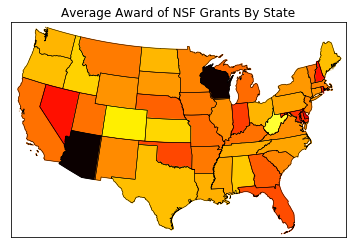

In [22]:

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
popdensity = dictionary

# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = np.min(averageAward); vmax = np.max(averageAward) # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Average Award of NSF Grants By State')
plt.show()

In [23]:
awardsPerDivision = collections.Counter(list(data_2016.Division))
awardsPerDivision

Counter({'Budget Division': 1,
         'Div Atmospheric & Geospace Sciences': 350,
         'Div Of Biological Infrastructure': 285,
         'Div Of Chem, Bioeng, Env, & Transp Sys': 647,
         'Div Of Civil, Mechanical, & Manufact Inn': 669,
         'Div Of Electrical, Commun & Cyber Sys': 346,
         'Div Of Engineering Education and Centers': 140,
         'Div Of Industrial Innovation & Partnersh': 881,
         'Div Of Information & Intelligent Systems': 589,
         'Div Of Molecular and Cellular Bioscience': 244,
         'Division Of Administrative Services': 2,
         'Division Of Astronomical Sciences': 221,
         'Division Of Behavioral and Cognitive Sci': 501,
         'Division Of Chemistry': 495,
         'Division Of Computer and Network Systems': 671,
         'Division Of Earth Sciences': 459,
         'Division Of Environmental Biology': 412,
         'Division Of Graduate Education': 152,
         'Division Of Human Resource Development': 200,
         

1004


<Container object of 50 artists>

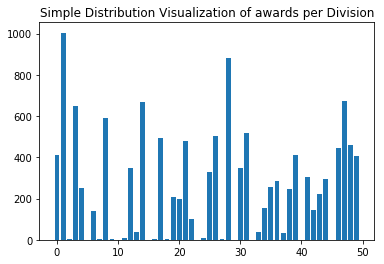

In [24]:
uValues = list( set( data_2016.Division))
xVals = awardsPerDivision.keys()
xaxis = range(0,len(xVals))
yVals = map( lambda x: awardsPerDivision[x], xVals)
print np.max(awardsPerDivision.values())
import pylab
pylab.title("Simple Distribution Visualization of awards per Division")
pylab.bar( xaxis, yVals)

In [25]:
data_2016_sortBy_Dvision = data_2016.sort_values(by=['Division'])

In [26]:
s=np.zeros(len(awardsPerDivision)+1)
j=0
for i in awardsPerDivision:
    s[j] = int(awardsPerDivision[i])
    j+=1    
print s.shape
print s
x = np.zeros(s.shape[0]-1)
x = s[1:-1]
s = np.copy(x)
print s, s.shape

(51,)
[  4.12000000e+02   1.00400000e+03   2.00000000e+00   6.47000000e+02
   2.53000000e+02   1.00000000e+00   1.40000000e+02   6.00000000e+00
   5.89000000e+02   2.00000000e+00   1.00000000e+00   7.00000000e+00
   3.46000000e+02   3.80000000e+01   6.69000000e+02   1.00000000e+00
   2.00000000e+00   4.95000000e+02   2.00000000e+00   2.07000000e+02
   2.00000000e+02   4.80000000e+02   1.01000000e+02   1.00000000e+00
   7.00000000e+00   3.31000000e+02   5.01000000e+02   2.00000000e+00
   8.81000000e+02   1.00000000e+00   3.50000000e+02   5.19000000e+02
   1.00000000e+00   3.80000000e+01   1.52000000e+02   2.54000000e+02
   2.85000000e+02   3.10000000e+01   2.44000000e+02   4.12000000e+02
   1.00000000e+00   3.04000000e+02   1.45000000e+02   2.21000000e+02
   2.97000000e+02   1.00000000e+00   4.43000000e+02   6.71000000e+02
   4.59000000e+02   4.07000000e+02   0.00000000e+00]
[  1.00400000e+03   2.00000000e+00   6.47000000e+02   2.53000000e+02
   1.00000000e+00   1.40000000e+02   6.00000

In [27]:
j=0
cont = 0
totalHead=0
slce=0
awardValues = np.zeros(s.shape[0])
averageAward = np.zeros(s.shape[0])
stateArr = list() 
for state in awardsPerDivision:
    stdev = 0
    if(cont == 0):#skip nan
        cont = 1
        continue
    stateArr.append(state)
    totalHead += int(s[j])
    slce = int(s[j])
    stateVals = collections.Counter(data_2016_sortBy_Dvision.head(totalHead).tail(slce).Award)
    for i in stateVals:
        if(re.match("\d+", str(i))):
            y = i
            #print y
            awardValues[j] += y
        else:
            slce-=1
    averageAward[j] = awardValues[j] / slce
    print j, ") ", "Division: ", stateArr[j], " : " , awardValues[j], " : ", slce, " : ", averageAward[j]
    j+=1

0 )  Division:  Division Of Mathematical Sciences  :  459130910.0  :  1004  :  457301.703187
1 )  Division:  Division of Institution & Award Support  :  441741.0  :  2  :  220870.5
2 )  Division:  Div Of Chem, Bioeng, Env, & Transp Sys  :  169736958.0  :  647  :  262344.602782
3 )  Division:  Office Of Internatl Science &Engineering  :  74811206.0  :  253  :  295696.466403
4 )  Division:  Office of Budget, Finance, & Award Management  :  50000.0  :  1  :  50000.0
5 )  Division:  Div Of Engineering Education and Centers  :  36552116.0  :  140  :  261086.542857
6 )  Division:  Division Of Human Resource Management  :  1085160.0  :  6  :  180860.0
7 )  Division:  Div Of Information & Intelligent Systems  :  168529297.0  :  589  :  286127.83871
8 )  Division:  Office Of Inspector General  :  275000.0  :  2  :  137500.0
9 )  Division:  Large Facilities Office  :  50000.0  :  1  :  50000.0
10 )  Division:  MPS Multidisciplinary Activities  :  2334055.0  :  7  :  333436.428571
11 )  Division:

1013741.70571


Text(0.5,1,u'Distribution of Average Awards Per Department')

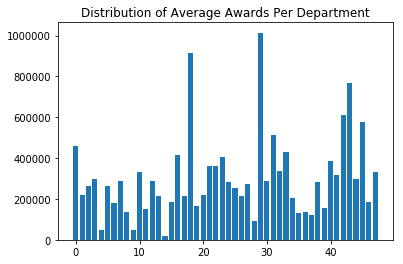

In [28]:
uValues = list( set( data_2016.Division))
xVals = awardsPerDivision.keys()
xaxis = range(0,48)
yVals = map( lambda x: averageAward[x], xaxis)
print np.max(averageAward)
import pylab
pylab.title("Simple Distribution Visualization of awards per Division")
pylab.bar( xaxis, yVals)
pylab.title("Distribution of Average Awards Per Department")

459130910.0


Text(0.5,1,u'Distribution of Average Awards Per Division')

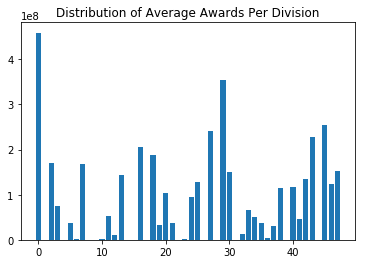

In [29]:
uValues = list( set( data_2016.Division))
xVals = awardsPerDivision.keys()
xaxis = range(0,48)
yVals = map( lambda x: awardValues[x], xaxis)
print np.max(awardValues)
import pylab
pylab.title("Simple Distribution Visualization of awards per Division")
pylab.bar( xaxis, yVals)
pylab.title("Distribution of Average Awards Per Division")

We can See that the "Div Atmospheric & Geospace Sciences" has the highest average award at 1013741 USD. While the "Division Of Mathematical Sciences" Recieved the most awards,1004, in 2016 which also amounted to the division which recieved the most grants, totalling 459130910 USD.